#### Restaurant Data Analysis using Python

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the data
df=pd.read_csv("Zomato_data.csv")
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
# Check for missing values
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
# Getting the statistics summary of numerical columns 
df.describe() 

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [6]:
# Count the number of unique restaurants in the dataset 
len(df['name'].unique())

145

*There are 145 unique restaurants in the dataset.*

In [7]:
# Find the average rating of restaurants in the dataset  
df['rate']=df['rate'].str.split('/').str[0].astype(float)
average_rating=df['rate'].mean()
print(average_rating)

3.6331081081081082


*The average rating of the restaurants is around 3.6.*

In [8]:
# Identify the restaurant with the highest rating
highest_rated_restaurant = df.sort_values(by='rate', ascending=False).iloc[0]
print(highest_rated_restaurant[['name', 'rate']])

name    Onesta
rate       4.6
Name: 44, dtype: object


*The restaurant with the hghest rating is Onesta with 4.6 rating.*

In [9]:
# Determine the percentage of restaurants in each price range
price_counts = df['approx_cost(for two people)'].value_counts()
price_percentage = (price_counts / len(df)) * 100
price_df = price_percentage.to_frame().reset_index()
price_df.columns = ['Price Range', 'Percentage']
price_df

,Price Range,Percentage
0,300,15.540541
1,200,10.810811
2,150,10.810811
3,400,10.135135
4,500,9.459459
5,600,8.783784
6,800,8.108108
7,100,4.054054
8,450,4.054054
9,250,4.054054


In [17]:
# Find the restaurant with the most reviews  
most_reviewed = df[df['votes'] == df['votes'].max()][['name', 'votes']]
print(most_reviewed)

                 name  votes
38  Empire Restaurant   4884


*The most reviewed restaurant is Empire Restaurant.*

In [11]:
# Find the most common restaurant name in the dataset
df['name'].value_counts().head(3)

name
San Churro Cafe    2
CAFE NOVA          2
Onesta             2
Name: count, dtype: int64

In [ ]:
# Determine how many restaurants have a rating above 4.5.
rating=df[df['rate']>4.5]
rating

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
44,Onesta,Yes,Yes,4.6,2556,600,other


*One restaurant has rating above 4.5*

In [13]:
# Find the average number of reviews
average_reviews = df['votes'].mean()
print(average_reviews)

264.81081081081084


*Average number of reviews is 264*

#### Visualized Exploratory Data Analysis

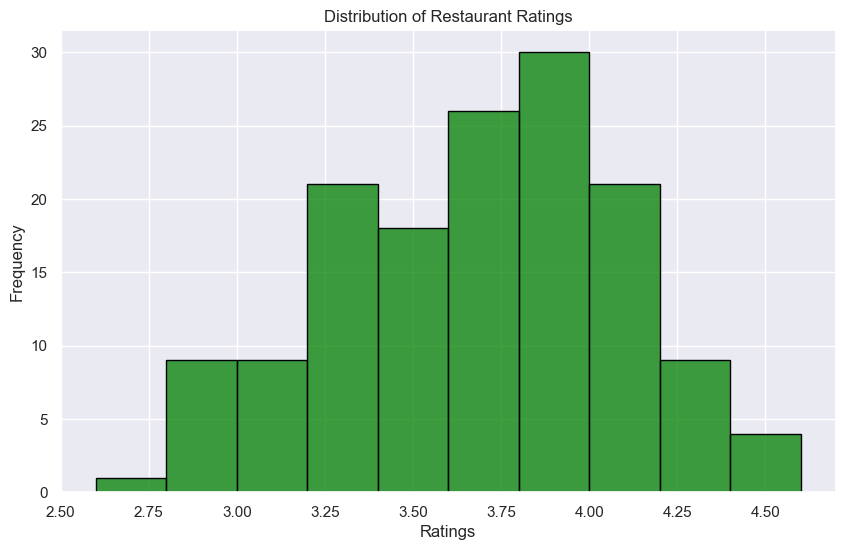

In [14]:
# Analyzing the distribution of restaurant ratings using a histogram

sns.set(rc={"figure.figsize":(10,6)})
sns.histplot(df['rate'], bins=10, edgecolor='black',color='green')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.show()



*The histogram shows that the most common restaurant ratings fall between 3.5 and 4.0.*

Text(0.5, 1.0, 'Top 5 Restaurants')

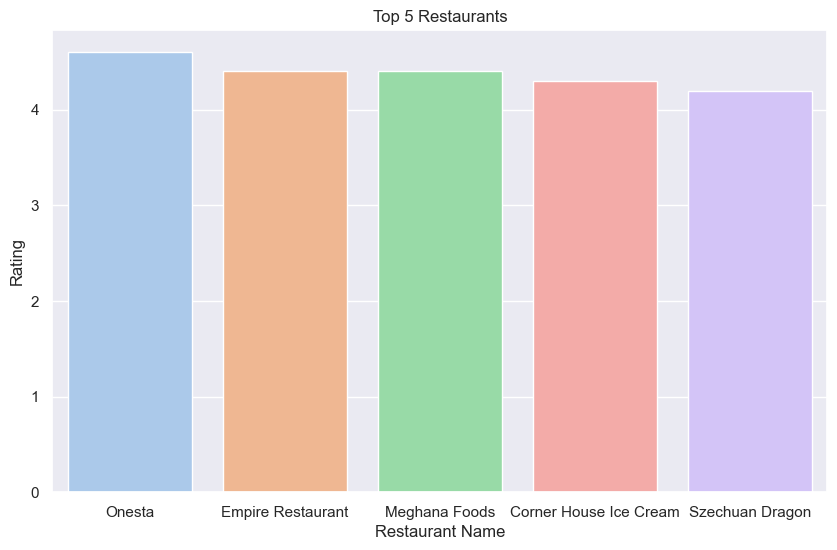

In [15]:
# Find the top 5 restaurants with the highest rating
highest_rated_restaurant = df.sort_values(by='rate', ascending=False).head(6)
sns.set(rc={"figure.figsize":(10,6)})
sns.barplot(data=highest_rated_restaurant,x='name',y='rate',hue='name',palette='pastel')
plt.xlabel("Restaurant Name")
plt.ylabel("Rating")
plt.title("Top 5 Restaurants")

*The chart displays the top 5 highest-rated restaurants based on their ratings.*

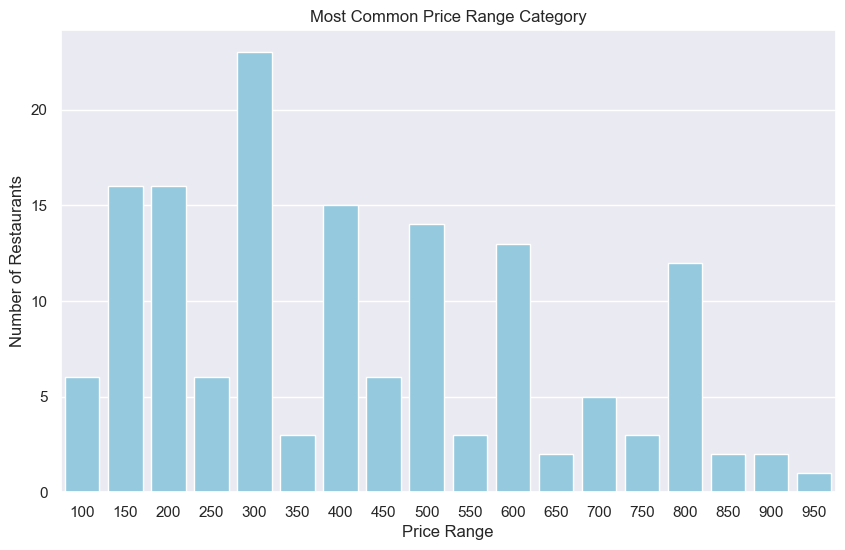

In [16]:
# Identify the most common price range category among restaurants
price_counts = df['approx_cost(for two people)'].value_counts().reset_index()
price_counts.columns=['Price','Number']

sns.barplot(data=price_counts,x='Price',y='Number' , color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Most Common Price Range Category')
plt.show()

*The chart shows that the most common price range for restaurants is ₹300 for two people.*

### Conclusion

*Most restaurants have similar ratings, showing what customers like. Also, many restaurants fall into the same price range, making them more common.*